# Introduction

Sentiment analysis is  like having a magic device that may recognize the emotions hiding in phrases. It's like having a superpower that lets you recognize if a person is happy, angry, or just feeling so-so primarily based on what they write or say.

Imagine you are at the internet, and you see plenty of remarks about a brand new video game. Some humans are absolutely excited, announcing it is the excellent factor ever, at the same time as others are grumbling and saying it's terrible. Sentiment evaluation helps you quickly sort through these kinds of remarks to discern out whether or not most humans are loving the game or hating it, without having to read each single remark. It's like having a detective who can instantly inform you what each person's mood is by means of just looking at their phrases.

In a brief, Sentiment analysis is a tool that may study among the lines of what people write to understand how they are feeling about something, making it remarkable reachable for businesses, researchers, and every person curious about humans's opinions on line.

# Objective

Now that we have got a clear understanding of what sentiment analysis is and how it can help us make informed decisions about which movies to watch, let's dive into the world of data and code. In this notebook, we'll explore the IMDb dataset, which contains a wealth of movie reviews and its sentiment.

Our goal is to build a machine learning model that can automatically determine whether a movie review is positive or negative. This model will be like our 'movie critic robot' from earlier, but it will analyze thousands of reviews in a matter of seconds.

So, get ready to uncover the power of sentiment analysis as we walk through the steps of loading the IMDb dataset, preprocessing the data, building and training our sentiment analysis model, and finally, using it to make movie-watching decisions.</br>
Let's get started!"

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [3]:
df.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [4]:
#Checking Missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
#Checking whether our data is Balanced or imbalances
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

As we can see we have equal review for both the positive and negative sentiment our data is **perfectly balanced**

## Dealing with Stopwords

We are trying to determine whether a review is positive or negative based on the words and phrases used. Stop words like "would," "shall," "could," and "might" are often removed because they don't provide much insight into the sentiment of the review. These words are more about possibilities or actions and don't strongly indicate whether "we" (the reviewers) liked or disliked the movie.

However, we might want to keep the word "not" in our analysis because it can significantly change the sentiment of a sentence. For example, "We liked the movie" is positive, but "We did not like the movie" is negative because of the word "not."

In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Define a list of new stopwords to add to the default list
new_stopwords = ["would", "shall", "could", "might"]

# Extend the default stopwords list with the new stopwords
stop_words.extend(new_stopwords)

# Remove the word "not" from the stopwords list (optional, depending on your analysis needs)
stop_words.remove("not")

# Convert the list of stopwords to a set for faster lookup
stop_words = set(stop_words)
print(stop_words)

{'now', 'themselves', 'shall', 'doesn', 'yours', "doesn't", 'yourselves', 'then', 'didn', 'the', "wasn't", 've', 'ours', 'they', 'few', 'out', 'than', 'mustn', 'to', 'nor', 'me', 'any', 'no', 'he', 'same', 'are', 'both', 'for', 'some', 'about', 'itself', "didn't", 'am', 'these', "hadn't", 'she', 'up', "shouldn't", 'that', 'in', 'wasn', 'below', 'ma', "don't", 'when', 'yourself', 'his', 'll', 'over', 'you', 'but', 'each', 'after', "mustn't", "that'll", 'your', 'all', 'does', 'ain', 'as', 'by', 'herself', 'or', 'it', 'because', 'should', 'hasn', 'against', 'theirs', 'has', 'myself', 'haven', 'more', 'had', 'd', 'down', 'a', 'other', 'o', 'very', "she's", 'been', 'couldn', 'and', 'who', 'don', 'those', 'on', 'needn', 'again', 'once', 'its', 'of', 'with', 'ourselves', 'further', 're', 'her', 'were', 'do', 'between', 'what', 'too', 'if', 'weren', "you're", 'having', 'until', 'might', 'our', 'off', "isn't", 'whom', 'was', 'my', "won't", 'such', "couldn't", "shan't", 'before', 'shouldn', "it'

# Data Cleaning and Preprocessing

**1. Removing Special Characters:**
   - In this step, we're getting rid of special characters like punctuation marks, symbols, and other non-alphanumeric characters in the text. These characters usually don't contribute much to understanding the text's meaning, so we're taking them out.

**2. Removing URLs:**
   - Here, we're eliminating web links or URLs from the text. These links don't provide useful information for our analysis, so we're deleting them.

**3. Removing Stopwords and removing words less than 3:**
   - Stopwords are common words like "the," "and," "is," etc., that occur frequently in the English language but often don't carry important meaning in the context of text analysis. We're removing these words from the text to focus on the more meaningful words.Also, We are removing words which are less than length 3 as they did not hold any meaningful meaning

**4. Expanding Contractions:**
   - Contractions are shortened forms of words, like "don't" for "do not" or "won't" for "will not." In this step, we're expanding these contractions back to their full forms. This helps ensure that we treat words consistently and understand their intended meanings.

**5. Data Preprocessing:**
   - Finally, we put all these steps together into a data preprocessing function. This function takes a piece of text as input and applies the above operations in a specific order to clean and prepare the text for further analysis. The result is cleaner and more structured text data that can be used for tasks like sentiment analysis, text classification, or any other text-based analysis.

Let's make the text easier to work with and to remove noise or irrelevant information so that we can focus on the meaningful content when analyzing text data.

In [7]:
import re

#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha()and len(i.strip()) >= 3:
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

In [8]:
# Applying the data_cleaning function to the 'review' column and storing the cleaned text in a new column 'clean_review'
df['clean_review'] = df['review'].apply(data_cleaning)

In [9]:
df.head(2)

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching episode hooke...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...


As of now,We have Pre processed our text and stored it in clean_review column.</br>
Lets perform some EDA on our newly pre proceesed clean_review text

# Exploratory Data Analysis

## Visualization of Positive and Negative Movie Review Keywords

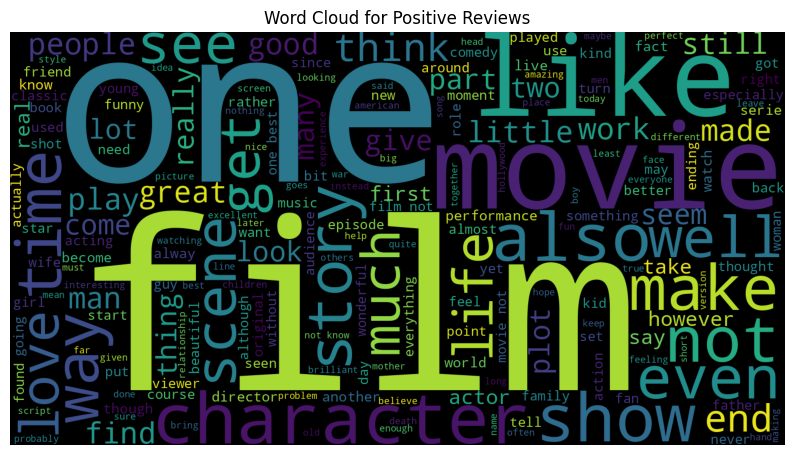

CPU times: user 24.8 s, sys: 1.96 s, total: 26.7 s
Wall time: 26.6 s


In [10]:
%%time
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to get only positive reviews
positive_reviews = df[df['sentiment'] == 'positive']
positive_sentences = positive_reviews['clean_review']

# Join the positive sentences into a single string
pos = ' '.join(map(str, positive_sentences))

# Create a WordCloud for positive reviews
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                          stopwords=stop_words,
                          min_font_size=15).generate(pos)

# Display the WordCloud for positive reviews
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()


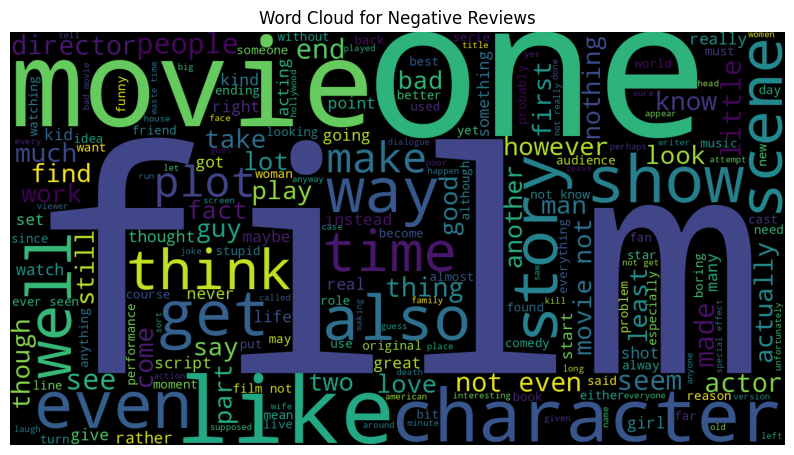

In [11]:
# Filter the DataFrame to get only negative reviews
negative_reviews = df[df['sentiment'] == 'negative']
negative_sentences = negative_reviews['clean_review']

# Join the positive sentences into a single string
pos = ' '.join(map(str, negative_sentences))

# Create a WordCloud for positive reviews
neg_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                          stopwords=stop_words,
                          min_font_size=15).generate(pos)

# Display the WordCloud for negative reviews
plt.figure(figsize=(10, 10))
plt.imshow(neg_wordcloud)
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()


## Top 25 words for both positive and negative sentiment

In [12]:
from collections import Counter

# Filter the DataFrame to get only negative reviews
negative_reviews = df[df['sentiment'] == 'negative']
negative_sentences = negative_reviews['clean_review']

# Tokenize negative reviews
negative_words = [word for review in negative_sentences for word in review.split()]

# Count word frequencies in negative reviews
negative_word_counts = Counter(negative_words)

# Get the top 25 words for negative sentiment
top_negative_words = negative_word_counts.most_common(25)

# Filter the DataFrame to get only positive reviews
positive_reviews = df[df['sentiment'] == 'positive']
positive_sentences = positive_reviews['clean_review']

# Tokenize positive reviews
positive_words = [word for review in positive_sentences for word in review.split()]

# Count word frequencies in positive reviews
positive_word_counts = Counter(positive_words)

# Get the top 25 words for positive sentiment
top_positive_words = positive_word_counts.most_common(25)




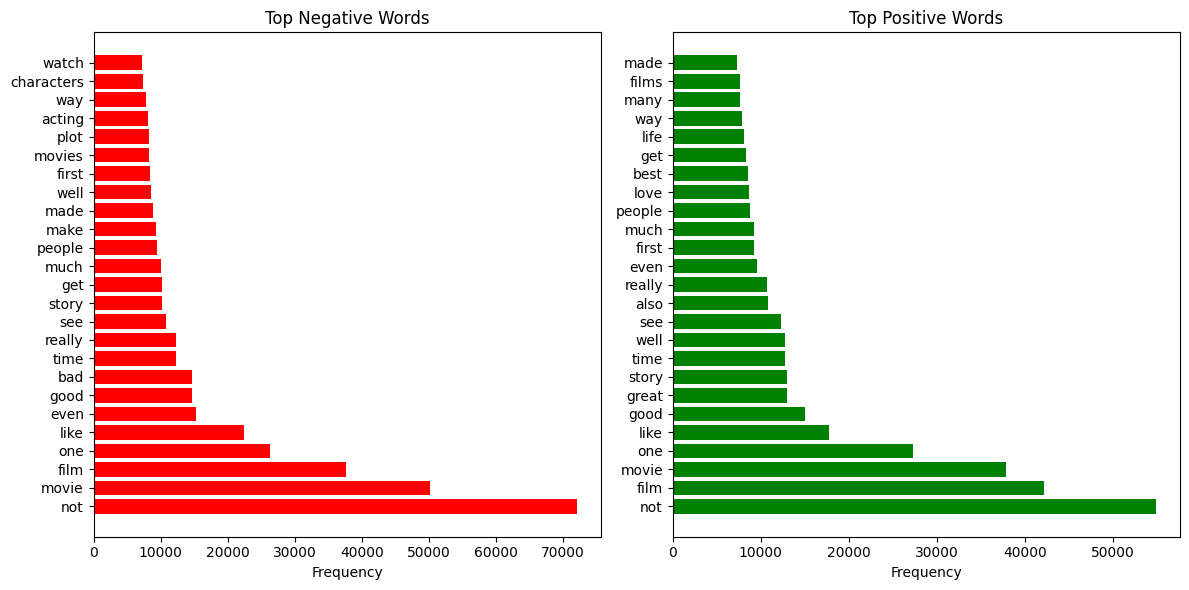

In [13]:
# Extract the top words and their counts
top_negative_words, negative_counts = zip(*top_negative_words)
top_positive_words, positive_counts = zip(*top_positive_words)

# Create subplots for positive and negative word frequencies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_negative_words, negative_counts, color='red')
plt.xlabel('Frequency')
plt.title('Top Negative Words')

plt.subplot(1, 2, 2)
plt.barh(top_positive_words, positive_counts, color='green')
plt.xlabel('Frequency')
plt.title('Top Positive Words')

plt.tight_layout()
plt.show()

## Review Length Comparison: How Long Good and Bad Movie Reviews Are

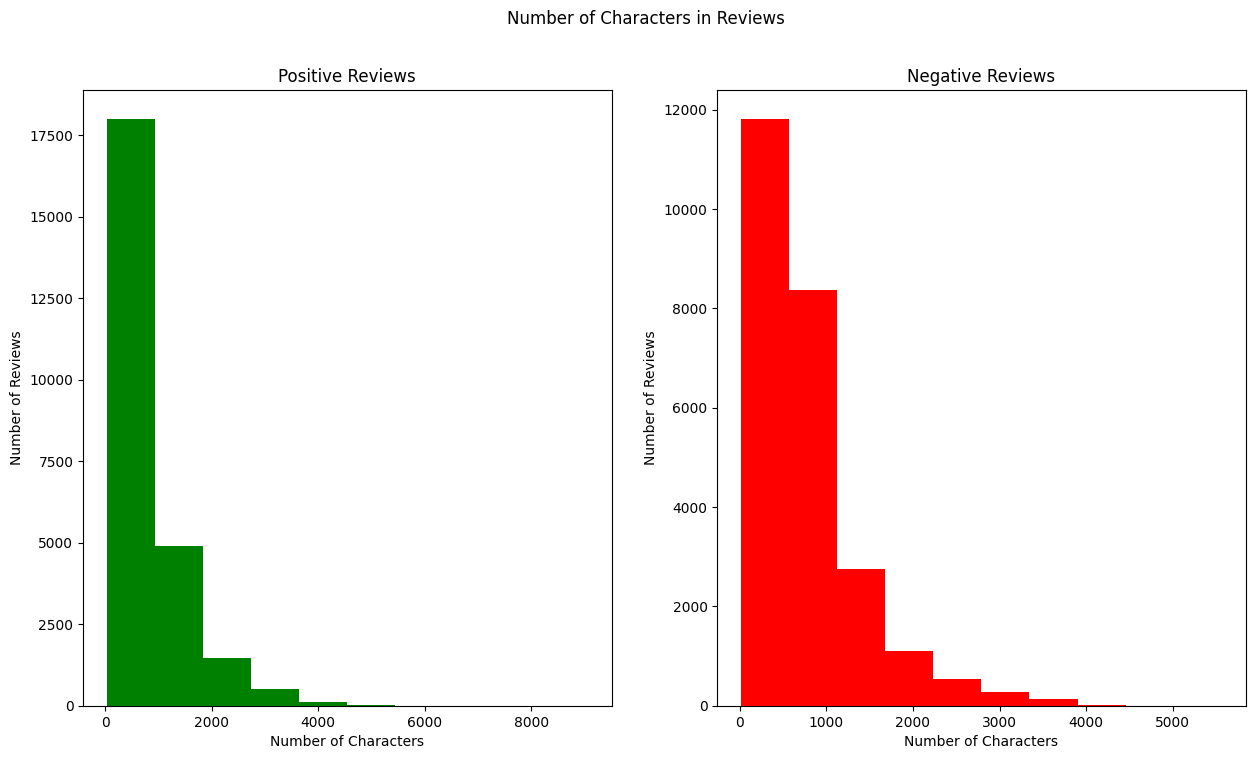

In [14]:

figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

# Positive Sentiment
len_pos_review = df[df['sentiment'] == 'positive']['clean_review'].str.len()
pos_ax.hist(len_pos_review, color='green')
pos_ax.set_title('Positive Reviews')
pos_ax.set_xlabel('Number of Characters')
pos_ax.set_ylabel('Number of Reviews')

# Negative Sentiment
len_neg_review = df[df['sentiment'] == 'negative']['clean_review'].str.len()
neg_ax.hist(len_neg_review, color='red')
neg_ax.set_title('Negative Reviews')
neg_ax.set_xlabel('Number of Characters')
neg_ax.set_ylabel('Number of Reviews')

figure.suptitle('Number of Characters in Reviews')
plt.show()


## Review Length Analysis: How Many Words People Use in Good and Bad Movie Reviews


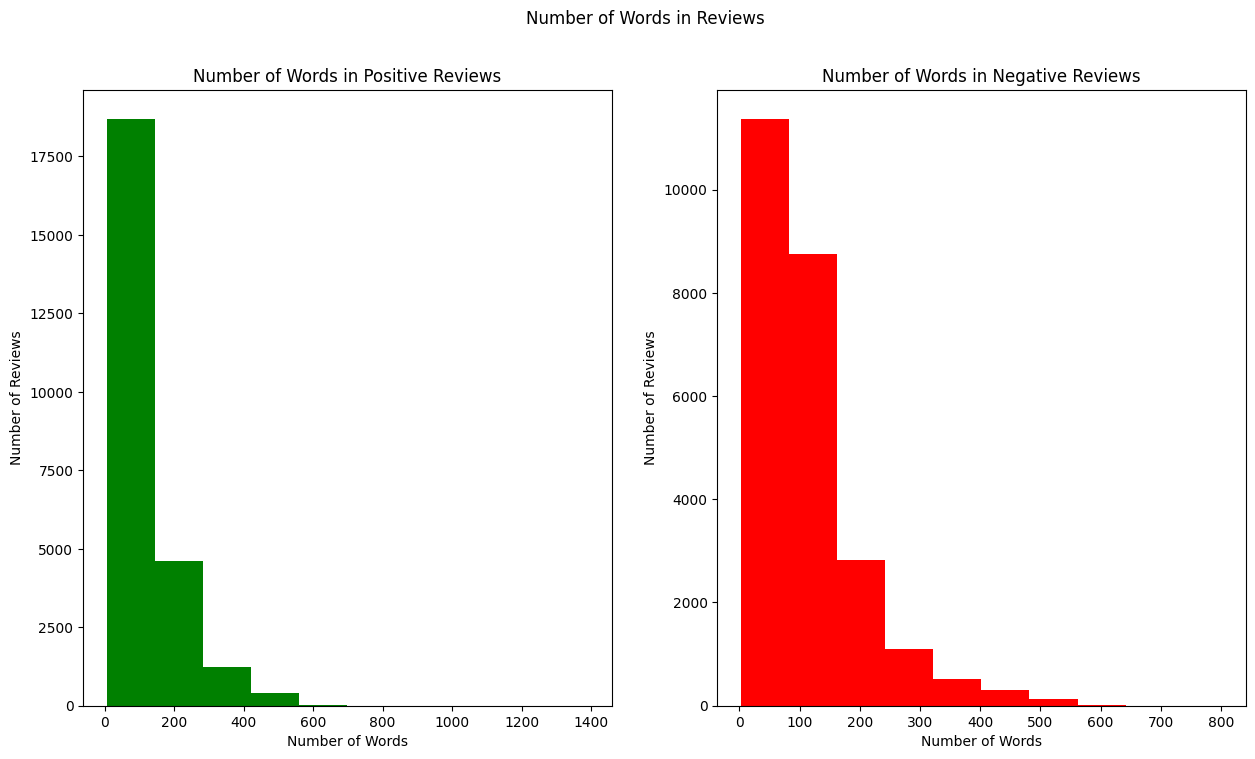

In [15]:
# Create subplots for positive and negative sentiments
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

# Positive Sentiment
pos_reviews = df[df['sentiment'] == 'positive']
pos_word = pos_reviews['clean_review'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word, color='green')
pos_ax.set_title('Number of Words in Positive Reviews')
pos_ax.set_xlabel('Number of Words')
pos_ax.set_ylabel('Number of Reviews')

# Negative Sentiment
neg_reviews = df[df['sentiment'] == 'negative']
neg_word = neg_reviews['clean_review'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word, color='red')
neg_ax.set_title('Number of Words in Negative Reviews')
neg_ax.set_xlabel('Number of Words')
neg_ax.set_ylabel('Number of Reviews')

figure.suptitle('Number of Words in Reviews')
plt.show()


/tmp/ipykernel_21/4043284280.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_word.map(lambda x: np.mean(x)), ax=pos_ax, color='green')
/tmp/ipykernel_21/4043284280.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_word.map(lambda x: np.mean(x)), ax=neg_ax, color='red')


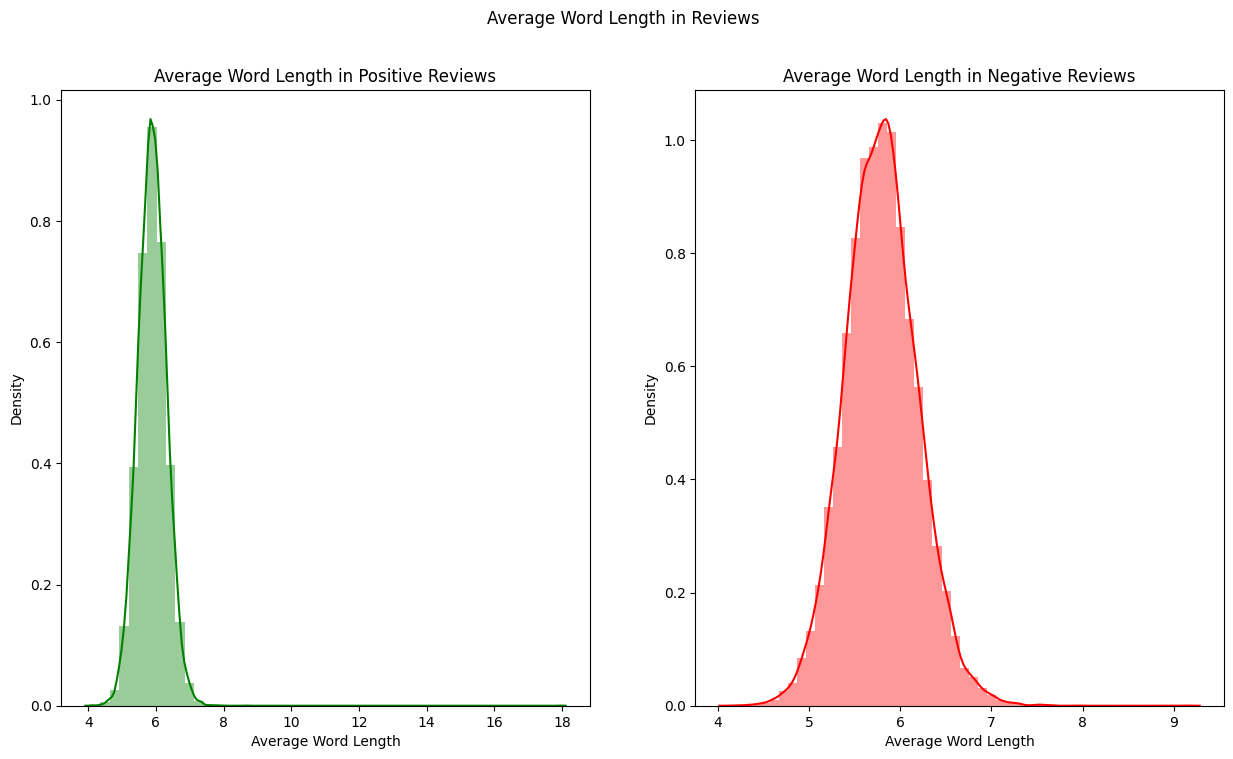

In [16]:
import seaborn as sns
# Create subplots for positive and negative sentiments
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

# Positive Sentiment
pos_reviews = df[df['sentiment'] == 'positive']
pos_word = pos_reviews['clean_review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)), ax=pos_ax, color='green')
pos_ax.set_title('Average Word Length in Positive Reviews')
pos_ax.set_xlabel('Average Word Length')
pos_ax.set_ylabel('Density')

# Negative Sentiment
neg_reviews = df[df['sentiment'] == 'negative']
neg_word = neg_reviews['clean_review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)), ax=neg_ax, color='red')
neg_ax.set_title('Average Word Length in Negative Reviews')
neg_ax.set_xlabel('Average Word Length')
neg_ax.set_ylabel('Density')

figure.suptitle('Average Word Length in Reviews')
plt.show()


In this code, we use the CountVectorizer technique to analyze a collection of positive sentiment reviews. We aim to find and display the top 20 most common single words (unigrams) used in these reviews. The code first extracts the positive sentiment reviews and then applies CountVectorizer to count the occurrences of individual words. These common words and their frequencies are organized into a table, and a bar plot is generated using Plotly Express. The resulting plot visually represents the most frequently occurring words in positive reviews, providing insights into the language and topics associated with positive sentiments in the text.


# Decoding Movie Reviews: What Words and Phrases Reveal About reviews

Let's uncover the language secrets hidden within movie reviews.3

**We will going to explore the most impactful individual words (unigrams), common pairs of words (bigrams), recurring three-word phrases (trigrams), and nuanced expressions in sets of four words (four-grams) and five-grams in both positive and negative reviews.**

By doing so, we try to gain profound insights into what truly resonates with audiences and what aspects leave them disappointed. This exploration helps us to make more informed movie choices, empowers filmmakers to create better films, and ultimately enriches our understanding of the cinematic world.

In [17]:
#Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [18]:
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
# Get the most common unigrams (single words) in positive sentiment reviews
most_common_uni = get_top_text_ngrams(df[df['sentiment'] == 'positive']['clean_review'], 20, 1)
most_common_uni = dict(most_common_uni)

# Create a DataFrame to store the common words and their counts
temp = pd.DataFrame(columns=["Common_words", 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_words", title='Common Words in Positive Reviews',
             orientation='h', width=700, height=700, color='Common_words')

fig.show()


In [19]:
# Get the most common bigrams (pairs of words) in positive sentiment reviews
most_common_bigrams = get_top_text_ngrams(df[df['sentiment'] == 'positive']['clean_review'], 20, 2)
most_common_bigrams = dict(most_common_bigrams)

# Create a DataFrame to store the common bigrams and their counts
temp = pd.DataFrame(columns=["Common_bigrams", 'Count'])
temp["Common_bigrams"] = list(most_common_bigrams.keys())
temp["Count"] = list(most_common_bigrams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_bigrams", title='Common Bigrams in Positive Reviews',
             orientation='h', width=700, height=700, color='Common_bigrams')

fig.show()

In [20]:
 #Get the most common trigrams (groups of three words) in positive sentiment reviews
most_common_trigrams = get_top_text_ngrams(df[df['sentiment'] == 'positive']['clean_review'], 20, 3)
most_common_trigrams = dict(most_common_trigrams)

# Create a DataFrame to store the common trigrams and their counts
temp = pd.DataFrame(columns=["Common_trigrams", 'Count'])
temp["Common_trigrams"] = list(most_common_trigrams.keys())
temp["Count"] = list(most_common_trigrams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_trigrams", title='Common Trigrams in Positive Reviews',
             orientation='h', width=700, height=700, color='Common_trigrams')

fig.show()



It's quite interesting that words like "not" (Unigrams), "not like" (Bi-grams), and "not like movie" (in Tri-grams) are showing up in positive reviews. To understand this better, let's take a closer look at some actual reviews where these words have been used. This way, we can see why these seemingly negative words are being used in a positive context and get a better understanding of the situation.

In [21]:
pd.options.display.max_colwidth = 1000
df[["review","sentiment"]][(df['sentiment'] == 'positive') & (df['review'].str.contains("not like| not | not like movie"))].head()


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wi...",pos

In [22]:
# Get the most common 4-grams (groups of four words) in positive sentiment reviews
most_common_4grams = get_top_text_ngrams(df[df['sentiment'] == 'positive']['clean_review'], 20, 4)
most_common_4grams = dict(most_common_4grams)

# Create a DataFrame to store the common 4-grams and their counts
temp = pd.DataFrame(columns=["Common_4grams", 'Count'])
temp["Common_4grams"] = list(most_common_4grams.keys())
temp["Count"] = list(most_common_4grams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_4grams", title='Common 4-Grams in Positive Reviews',
             orientation='h', width=700, height=700, color='Common_4grams')

fig.show()


In [23]:
# Get the most common 5-grams (groups of five words) in positive sentiment reviews
most_common_5grams = get_top_text_ngrams(df[df['sentiment'] == 'positive']['clean_review'], 20, 5)
most_common_5grams = dict(most_common_5grams)

# Create a DataFrame to store the common 5-grams and their counts
temp = pd.DataFrame(columns=["Common_5grams", 'Count'])
temp["Common_5grams"] = list(most_common_5grams.keys())
temp["Count"] = list(most_common_5grams.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_5grams", title='Common 5-Grams in Positive Reviews',
             orientation='h', width=700, height=700, color='Common_5grams')

fig.show()


## **Let's do the same for Negative reviews as well**

In [24]:
# Get the most common unigrams (single words) in negative sentiment reviews
most_common_unigrams_negative = get_top_text_ngrams(df[df['sentiment'] == 'negative']['clean_review'], 20, 1)
most_common_unigrams_negative = dict(most_common_unigrams_negative)

# Create a DataFrame to store the common unigrams and their counts
temp = pd.DataFrame(columns=["Common_unigrams", 'Count'])
temp["Common_unigrams"] = list(most_common_unigrams_negative.keys())
temp["Count"] = list(most_common_unigrams_negative.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_unigrams", title='Common Unigrams in Negative Reviews',
             orientation='h', width=700, height=700, color='Common_unigrams')

fig.show()

In [25]:
# Get the most common bigrams (pairs of words) in negative sentiment reviews
most_common_bigrams_negative = get_top_text_ngrams(df[df['sentiment'] == 'negative']['clean_review'], 20, 2)
most_common_bigrams_negative = dict(most_common_bigrams_negative)

# Create a DataFrame to store the common bigrams and their counts
temp = pd.DataFrame(columns=["Common_bigrams", 'Count'])
temp["Common_bigrams"] = list(most_common_bigrams_negative.keys())
temp["Count"] = list(most_common_bigrams_negative.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_bigrams", title='Common Bigrams in Negative Reviews',
             orientation='h', width=700, height=700, color='Common_bigrams')

fig.show()


In [26]:
# Get the most common trigrams (groups of three words) in negative sentiment reviews
most_common_trigrams_negative = get_top_text_ngrams(df[df['sentiment'] == 'negative']['clean_review'], 20, 3)
most_common_trigrams_negative = dict(most_common_trigrams_negative)

# Create a DataFrame to store the common trigrams and their counts
temp = pd.DataFrame(columns=["Common_trigrams", 'Count'])
temp["Common_trigrams"] = list(most_common_trigrams_negative.keys())
temp["Count"] = list(most_common_trigrams_negative.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_trigrams", title='Common Trigrams in Negative Reviews',
             orientation='h', width=700, height=700, color='Common_trigrams')

fig.show()


In [27]:
# Get the most common 4-grams (groups of four words) in negative sentiment reviews
most_common_4grams_negative = get_top_text_ngrams(df[df['sentiment'] == 'negative']['clean_review'], 20, 4)
most_common_4grams_negative = dict(most_common_4grams_negative)

# Create a DataFrame to store the common 4-grams and their counts
temp = pd.DataFrame(columns=["Common_4grams", 'Count'])
temp["Common_4grams"] = list(most_common_4grams_negative.keys())
temp["Count"] = list(most_common_4grams_negative.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_4grams", title='Common 4-Grams in Negative Reviews',
             orientation='h', width=700, height=700, color='Common_4grams')

fig.show()



In [28]:
# Get the most common 5-grams (groups of five words) in negative sentiment reviews
most_common_5grams_negative = get_top_text_ngrams(df[df['sentiment'] == 'negative']['clean_review'], 20, 5)
most_common_5grams_negative = dict(most_common_5grams_negative)

# Create a DataFrame to store the common 5-grams and their counts
temp = pd.DataFrame(columns=["Common_5grams", 'Count'])
temp["Common_5grams"] = list(most_common_5grams_negative.keys())
temp["Count"] = list(most_common_5grams_negative.values())

# Create a bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_5grams", title='Common 5-Grams in Negative Reviews',
             orientation='h', width=700, height=700, color='Common_5grams')

fig.show()


## Lemmatization

In [29]:
# lemmatization of word 
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

## Vectorization with Count Vectorizer and TFIDF Vectorizer with Unigram

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import nltk

#use this command if you have any issues using wordnet
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

train,test=train_test_split(df,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['clean_review']).toarray()
x_test_count = countvect.transform(test['clean_review']).toarray()
y_train = train['sentiment']
y_test = test['sentiment']

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



## Feature Importance with Logistic Regression and Count Vectorizer with unigram

In [31]:
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+-----------------------+
|    Feature     |         Score         |
+----------------+-----------------------+
|      able      |  0.19276263407150804  |
|   absolutely   |  -0.11479361597142525 |
|     across     |  0.01327641747031917  |
|      act       |  -0.08383124972401454 |
|     acting     |  -0.15484072263762735 |
|     action     |  0.14355782522805238  |
|     actor      |  -0.16028808295860064 |
|    actress     |  -0.11666919542859916 |
|    actually    | -0.057188108484670895 |
|      add       |  0.12203764509194517  |
|      age       |   0.0767108152418372  |
|      ago       |  0.06452302513489178  |
|     almost     |  0.01580388319176975  |
|     alone      |   0.1321026716426368  |
|     along      |  0.11455536659801059  |
|    already     |  -0.25003040930829534 |
|      also      |  0.11963933235014715  |
|    although    |   0.2368688772866969  |
|     always     |  0.28424013563956835  |
|    amazing     |   0.9492953145836154  |
|    americ

## Feature Importance with TFIDF vectorizer and Logistic Regression with Unigram

In [32]:
x_train_tfidf = tfidfvect.fit_transform(train['clean_review']).toarray()
x_test_tfidf = tfidfvect.transform(test['clean_review']).toarray()
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=100:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



+----------------+----------------------+
|    Feature     |        Score         |
+----------------+----------------------+
|      able      |  1.1441625233752803  |
|   absolutely   | -0.4691376120472458  |
|     across     | -0.07378856967066116 |
|      act       | -0.6838663467654323  |
|     acting     | -1.3180214028606827  |
|     action     |  0.9087445031402454  |
|     actor      | -1.2439215282108005  |
|    actress     | -0.5268994527473756  |
|    actually    | -0.7166119378754191  |
|      add       |  0.659663920829929   |
|      age       |  0.8070566862470515  |
|      ago       |  0.2652423905330887  |
|     almost     | 0.13198473579117379  |
|     alone      |  0.7165955062571058  |
|     along      |  0.7557576130721789  |
|    already     |  -1.062997862376782  |
|      also      |  1.671062243328734   |
|    although    |  1.4232991365274317  |
|     always     |  2.3407453690640128  |
|    amazing     |  4.700548194219271   |
|    american    | 0.1975465517414

## Vectorization with Count Vectorizer and TFIDF Vectorizer with Bigram

In [33]:
train,test=train_test_split(df,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['clean_review']).toarray()
x_test_count = countvect.transform(test['clean_review']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['clean_review']).toarray()
x_test_tfidf = tfidfvect.transform(test['clean_review']).toarray()

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [34]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+------------------------+
|        Feature        |         Score          |
+-----------------------+------------------------+
|   absolutely nothing  |   -1.575901649394275   |
|     academy award     |   0.6894768203682919   |
|        act like       |  -0.45743935883494324  |
|       acting bad      |  -1.0660388122964255   |
|       acting not      |  -0.5360296724430341   |
|      action film      |  0.08125568990325434   |
|      action movie     |  0.03183205470411944   |
|      action scene     |  -0.1813097915244219   |
|    action sequence    |  -0.11940882459547966  |
|     actor actress     |  0.20886718145487598   |
|       actor not       |  -0.20379226933099612  |
|      almost every     |  0.10097346823379627   |
|       along way       |   0.4952057565333266   |
|       also good       |   1.3592639076104533   |
|        also not       |  -0.3572691380748107   |
|      although not     |   0.6574518680521962   |
|      anyone else      |  0.09

In [35]:
x_train_tfidf = tfidfvect.fit_transform(train['clean_review']).toarray()
x_test_tfidf = tfidfvect.transform(test['clean_review']).toarray()
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=100:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



+-----------------------+----------------------+
|        Feature        |        Score         |
+-----------------------+----------------------+
|   absolutely nothing  |  -2.944554762772752  |
|     academy award     |  1.4564424223477634  |
|        act like       | -1.0452240665549735  |
|       acting bad      |  -2.575862190223158  |
|       acting not      | -1.0757033403946654  |
|      action film      | -0.12382682443797689 |
|      action movie     | 0.03626997621296614  |
|      action scene     | -0.43131485523797175 |
|    action sequence    | -0.3551074285896241  |
|     actor actress     |  0.4794372433209991  |
|       actor not       | -0.6011272201426332  |
|      almost every     | 0.11904361445307318  |
|       along way       |  0.8094757838524652  |
|       also good       |  2.536988239238666   |
|        also not       | -0.6049206713323814  |
|      although not     |  1.305183662867823   |
|      anyone else      | 0.09595146140561289  |
|     anything else 

## Vectorization with Count Vectorizer and TFIDF Vectorizer with Trigram

In [36]:
train,test=train_test_split(df,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['clean_review']).toarray()
x_test_count = countvect.transform(test['clean_review']).toarray()
y_train = train['sentiment']
y_test = test['sentiment']

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [37]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------------+-----------------------+
|           Feature           |         Score         |
+-----------------------------+-----------------------+
|        acting not bad       |  -1.2609758227243215  |
|      acting pretty good     |   0.0963162686345615  |
|      action take place      |  0.35712834292574686  |
|       actually not bad      |   -1.02106142958136   |
|     actually pretty good    |  -0.2805613791712348  |
|      almost every scene     |  -0.5452019518275977  |
|      avoid like plague      |  -2.6221457633742795  |
|        bad acting bad       |  -1.8318811364204748  |
|         bad bad bad         |  -1.8505228018891229  |
|         bad guy not         |  -0.5535502232260557  |
|        bad movie not        |  -0.8000344925197725  |
|         bad not even        |   -2.33138996377679   |
|        bad script bad       |  -1.0100135916293564  |
|      bad special effect     |  -0.4309012055632393  |
|       based true story      |   1.024770955083

## Feature Importance with Logistic Regression and TFIDF Vectorizer with Trigram

In [38]:
x_train_tfidf = tfidfvect.fit_transform(train['clean_review']).toarray()
x_test_tfidf = tfidfvect.transform(test['clean_review']).toarray()

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [39]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------------+-----------------------+
|           Feature           |         Score         |
+-----------------------------+-----------------------+
|        acting not bad       |  -1.4536708728126397  |
|      acting pretty good     |  0.10184730819346832  |
|      action take place      |   0.486354439183393   |
|       actually not bad      |  -1.2492821313015048  |
|     actually pretty good    |  -0.33445669079797297 |
|      almost every scene     |  -0.6293940105357758  |
|      avoid like plague      |  -2.8224635947220387  |
|        bad acting bad       |  -2.5309024632495776  |
|         bad bad bad         |   -2.151406980929916  |
|         bad guy not         |  -0.5952843629544562  |
|        bad movie not        |  -1.4986271388433867  |
|         bad not even        |  -2.5970514788743286  |
|        bad script bad       |   -1.426221361828617  |
|      bad special effect     |  -0.9502296705518213  |
|       based true story      |   1.196750605982

## Vectorization with Count Vectorizer and TFIDF Vectorizer with 4-gram

In [40]:
train,test=train_test_split(df,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['clean_review']).toarray()
x_test_count = countvect.transform(test['clean_review']).toarray()

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



## Feature Importance with Logistic Regression and Count Vectorizer with 4-gram

In [41]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-------------------------------------+-----------------------+
|               Feature               |         Score         |
+-------------------------------------+-----------------------+
|     absolutely worst movie ever     |   -0.979622176716817  |
|    according dvd sleeve synopsis    |  -1.7990874633380636  |
|        acting worst ever seen       |  -1.5298566651159655  |
|       aka gft amazon reviewer       |  0.03900914792353853  |
|      aspect ratio sound format      |  -1.3467773892861166  |
|       avoid movie like plague       |  -1.9361476950495689  |
|        bad acting bad writing       |  -1.6254155954471647  |
|         best film ever made         |   1.0986849573315935  |
|         best film ever seen         |  -0.10692214746982079 |
|         best film seen year         |    1.05549074932274   |
|         best movie ever made        | -0.041373428148507974 |
|         best movie ever seen        |   1.6935004884006022  |
|         best movie seen long        | 

## Feature Importance with Logistic Regression and TFIDF Vectorizer with 4-gram

In [42]:
x_train_tfidf = tfidfvect.fit_transform(train['clean_review']).toarray()
x_test_tfidf = tfidfvect.transform(test['clean_review']).toarray()
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



+-------------------------------------+------------------------+
|               Feature               |         Score          |
+-------------------------------------+------------------------+
|     absolutely worst movie ever     |   -1.082907660361295   |
|    according dvd sleeve synopsis    |  -1.7994551591121668   |
|        acting worst ever seen       |  -1.5473256890957656   |
|       aka gft amazon reviewer       |  0.027534041896652123  |
|      aspect ratio sound format      |  -1.3476805458044767   |
|       avoid movie like plague       |  -1.9476220614137498   |
|        bad acting bad writing       |  -1.6331267338236386   |
|         best film ever made         |   1.2515693597998674   |
|         best film ever seen         |  0.22213795824790009   |
|         best film seen year         |   1.1559243056284074   |
|         best movie ever made        |  0.14591327070641752   |
|         best movie ever seen        |   1.7497020561713148   |
|         best movie seen

### we have decide to go ahead with the TFIDF vectorizer over CountVectorizer

In [43]:
train,test=train_test_split(df,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=5000)
# x_train_count = countvect.fit_transform(train['clean_review']).toarray()
# x_test_count = countvect.transform(test['clean_review']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['clean_review']).toarray()
x_test_tfidf = tfidfvect.transform(test['clean_review']).toarray()
y_train = train['sentiment']
y_test = test['sentiment']

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [44]:
# Import  libraries
import sys
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# Logistic Regression

In [45]:
model_1=LogisticRegression()

In [46]:
%%time
model_1.fit(x_train_tfidf,y_train)

CPU times: user 49 s, sys: 2.5 s, total: 51.5 s
Wall time: 13.6 s


LogisticRegression()

In [47]:
%%time
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_1 =f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score ftraining dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on test for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)

Precision Score on training dateset for Logistic Regression: 0.917
AUC Score on training dateset for Logistic Regression: 0.9731716652824839
F1 Score ftraining dateset for Logistic Regression: 0.9169976614065201
Precision Score on test for Logistic Regression: 0.8961333333333333
AUC Score on test for Logistic Regression: 0.9602034981672709
F1 Score for Logistic Regression: 0.8961160392167735
CPU times: user 3.83 s, sys: 1.34 s, total: 5.18 s
Wall time: 2.33 s


# Decision Tree Classifier

In [48]:
model_2 = Pipeline(
    steps=[
        #("classifier", DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)),
    ("classifier", DecisionTreeClassifier())
    ]
)

In [49]:
%%time
model_2.fit(x_train_tfidf,y_train)

CPU times: user 2min 2s, sys: 250 ms, total: 2min 2s
Wall time: 2min 2s


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In [50]:
%%time
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_2 =f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_2)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_2)

Precision Score on training dateset for Decision Tree Classifier: 1.0
AUC Score on training dateset for Decision Tree Classifier: 1.0
F1 Score training dateset for Decision Tree Classifier: 1.0
Precision Score on test for Decision Tree Classifier: 0.7183333333333334
AUC Score on test for Decision Tree Classifier: 0.7183640828782308
F1 Score for Decision Tree Classifier: 0.7183432496009484
CPU times: user 2.11 s, sys: 540 ms, total: 2.65 s
Wall time: 2.64 s


## Decision Tree Classifier with max depth 11 to fix overfit

In [51]:
model_3 = Pipeline(
    steps=[
        ("classifier", DecisionTreeClassifier( criterion='gini', max_depth=11, min_samples_split=2, min_samples_leaf=1)),
    ]
)

In [52]:
%%time
model_3.fit(x_train_tfidf,y_train)

CPU times: user 25.8 s, sys: 126 ms, total: 25.9 s
Wall time: 25.9 s


Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=11))])

In [53]:
%%time
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_3.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_3.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_3 =f1_score(y_train,model_3.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_3)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_3.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_3.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_3 =f1_score(y_test,model_3.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_3)

Precision Score on training dateset for Decision Tree Classifier: 0.7732285714285714
AUC Score on training dateset for Decision Tree Classifier: 0.8331411144841397
F1 Score training dateset for Decision Tree Classifier: 0.7704686393735253
Precision Score on test for Decision Tree Classifier: 0.7410666666666667
AUC Score on test for Decision Tree Classifier: 0.7783361635689178
F1 Score for Decision Tree Classifier: 0.7375267470820686
CPU times: user 2.02 s, sys: 544 ms, total: 2.56 s
Wall time: 2.56 s


# Random Forest Classifier

In [54]:
model_4 = Pipeline(
    steps=[
        #("classifier", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None))
    ("classifier", RandomForestClassifier())]
)

In [55]:
%%time
model_4.fit(x_train_tfidf,y_train)

CPU times: user 1min 41s, sys: 220 ms, total: 1min 41s
Wall time: 1min 41s


Pipeline(steps=[('classifier', RandomForestClassifier())])

In [56]:
%%time
print("Precision Score on training dateset for Random Forest Classifier: %s" % precision_score(y_train,model_4.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Random Forest Classifier: %s" % roc_auc_score(y_train,model_4.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_4 =f1_score(y_train,model_4.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Random Forest Classifier: %s" % f1_score_train_4)
print("Precision Score on test for Random Forest Classifier: %s" % precision_score(y_test,model_4.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Random Forest Classifier: %s" % roc_auc_score(y_test,model_4.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_4 =f1_score(y_test,model_4.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_4)

Precision Score on training dateset for Random Forest Classifier: 1.0
AUC Score on training dateset for Random Forest Classifier: 1.0
F1 Score training dateset for Random Forest Classifier: 1.0
Precision Score on test for Random Forest Classifier: 0.8525333333333334
AUC Score on test for Random Forest Classifier: 0.9328657018528779
F1 Score for Random Forest Classifier: 0.8525355826963942
CPU times: user 13.6 s, sys: 540 ms, total: 14.1 s
Wall time: 14.1 s


# Ada Boost Classifier

In [57]:
model_5 = Pipeline(
    steps=[
        ("classifier", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
    n_estimators=100,
    learning_rate=.8)),
    ]
)

In [58]:
%%time
model_5.fit(x_train_tfidf,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



CPU times: user 18min 29s, sys: 25.8 s, total: 18min 55s
Wall time: 18min 55s


Pipeline(steps=[('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                                    learning_rate=0.8, n_estimators=100))])

In [59]:
%%time
print("Precision Score on training dateset for Ada Boost Classifier: %s" % precision_score(y_train,model_5.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Ada Boost Classifier: %s" % roc_auc_score(y_train,model_5.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_5 =f1_score(y_train,model_5.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Ada Boost Classifier: %s" % f1_score_train_5)
print("Precision Score on test for Ada Boost Classifier: %s" % precision_score(y_test,model_5.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Ada Boost Classifier: %s" % roc_auc_score(y_test,model_5.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_5 =f1_score(y_test,model_5.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_5)

Precision Score on training dateset for Ada Boost Classifier: 0.9317428571428571
AUC Score on training dateset for Ada Boost Classifier: 0.9860381841908799
F1 Score training dateset for Ada Boost Classifier: 0.9317414120309859
Precision Score on test for Ada Boost Classifier: 0.8396
AUC Score on test for Ada Boost Classifier: 0.9007304477489176
F1 Score for Random Forest Classifier: 0.8395796327964944
CPU times: user 1min 39s, sys: 55 s, total: 2min 34s
Wall time: 2min 34s


# Hyperparameter Tunning with Grid Search

In [60]:
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

def hyperparamtune(classifier, param_grid,metric,verbose_value,cv):
    model=model_selection.GridSearchCV(
            estimator=classifier,
            param_grid=param_grid,
            scoring=metric,
            verbose=verbose_value,            
            cv=cv)

    model.fit(x_train_tfidf,y_train)
    print("Best Score %s" % {model.best_score_})
    print("Best hyperparameter set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")
    return model, best_parameters

In [61]:
%%time
param_gd={"penalty":["l2","l1"],
         "C":[0.01,0.1,1.0,10],
         "tol":[0.0001,0.001,0.01],
         "max_iter":[100,200]}
model_7, best_param = hyperparamtune(LogisticRegression(),param_gd,"accuracy",10,5)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 1/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.823 total time=   2.0s
[CV 2/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 2/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.839 total time=   2.6s
[CV 3/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 3/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.839 total time=   1.9s
[CV 4/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 4/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.829 total time=   1.9s
[CV 5/5; 1/48] START C=0.01, max_iter=100, penalty=l2, tol=0.0001...............
[CV 5/5; 1/48] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.833 total time=   1.8s
[CV 1/5; 2/48] START C=0.01, max_iter=100, penal

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 1/5; 37/48] END C=10, max_iter=100, penalty=l2, tol=0.0001;, score=0.889 total time=  12.9s
[CV 2/5; 37/48] START C=10, max_iter=100, penalty=l2, tol=0.0001................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 2/5; 37/48] END C=10, max_iter=100, penalty=l2, tol=0.0001;, score=0.883 total time=  12.0s
[CV 3/5; 37/48] START C=10, max_iter=100, penalty=l2, tol=0.0001................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 3/5; 37/48] END C=10, max_iter=100, penalty=l2, tol=0.0001;, score=0.882 total time=  12.0s
[CV 4/5; 37/48] START C=10, max_iter=100, penalty=l2, tol=0.0001................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 4/5; 37/48] END C=10, max_iter=100, penalty=l2, tol=0.0001;, score=0.883 total time=  13.0s
[CV 5/5; 37/48] START C=10, max_iter=100, penalty=l2, tol=0.0001................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 5/5; 37/48] END C=10, max_iter=100, penalty=l2, tol=0.0001;, score=0.885 total time=  12.0s
[CV 1/5; 38/48] START C=10, max_iter=100, penalty=l2, tol=0.001.................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 1/5; 38/48] END C=10, max_iter=100, penalty=l2, tol=0.001;, score=0.889 total time=  13.0s
[CV 2/5; 38/48] START C=10, max_iter=100, penalty=l2, tol=0.001.................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 2/5; 38/48] END C=10, max_iter=100, penalty=l2, tol=0.001;, score=0.883 total time=  12.2s
[CV 3/5; 38/48] START C=10, max_iter=100, penalty=l2, tol=0.001.................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 3/5; 38/48] END C=10, max_iter=100, penalty=l2, tol=0.001;, score=0.882 total time=  11.9s
[CV 4/5; 38/48] START C=10, max_iter=100, penalty=l2, tol=0.001.................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 4/5; 38/48] END C=10, max_iter=100, penalty=l2, tol=0.001;, score=0.883 total time=  12.9s
[CV 5/5; 38/48] START C=10, max_iter=100, penalty=l2, tol=0.001.................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 5/5; 38/48] END C=10, max_iter=100, penalty=l2, tol=0.001;, score=0.885 total time=  12.0s
[CV 1/5; 39/48] START C=10, max_iter=100, penalty=l2, tol=0.01..................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 1/5; 39/48] END C=10, max_iter=100, penalty=l2, tol=0.01;, score=0.889 total time=  12.6s
[CV 2/5; 39/48] START C=10, max_iter=100, penalty=l2, tol=0.01..................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 2/5; 39/48] END C=10, max_iter=100, penalty=l2, tol=0.01;, score=0.883 total time=  11.9s
[CV 3/5; 39/48] START C=10, max_iter=100, penalty=l2, tol=0.01..................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 3/5; 39/48] END C=10, max_iter=100, penalty=l2, tol=0.01;, score=0.882 total time=  11.9s
[CV 4/5; 39/48] START C=10, max_iter=100, penalty=l2, tol=0.01..................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 4/5; 39/48] END C=10, max_iter=100, penalty=l2, tol=0.01;, score=0.883 total time=  12.9s
[CV 5/5; 39/48] START C=10, max_iter=100, penalty=l2, tol=0.01..................


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 5/5; 39/48] END C=10, max_iter=100, penalty=l2, tol=0.01;, score=0.885 total time=  12.2s
[CV 1/5; 40/48] START C=10, max_iter=100, penalty=l1, tol=0.0001................
[CV 1/5; 40/48] END C=10, max_iter=100, penalty=l1, tol=0.0001;, score=nan total time=   0.5s
[CV 2/5; 40/48] START C=10, max_iter=100, penalty=l1, tol=0.0001................
[CV 2/5; 40/48] END C=10, max_iter=100, penalty=l1, tol=0.0001;, score=nan total time=   0.4s
[CV 3/5; 40/48] START C=10, max_iter=100, penalty=l1, tol=0.0001................
[CV 3/5; 40/48] END C=10, max_iter=100, penalty=l1, tol=0.0001;, score=nan total time=   0.4s
[CV 4/5; 40/48] START C=10, max_iter=100, penalty=l1, tol=0.0001................
[CV 4/5; 40/48] END C=10, max_iter=100, penalty=l1, tol=0.0001;, score=nan total time=   0.4s
[CV 5/5; 40/48] START C=10, max_iter=100, penalty=l1, tol=0.0001................
[CV 5/5; 40/48] END C=10, max_iter=100, penalty=l1, tol=0.0001;, score=nan total time=   0.4s
[CV 1/5; 41/48] START C=10, max

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Score {0.8904857142857143}
Best hyperparameter set:
	C: 1.0
	max_iter: 100
	penalty: l2
	tol: 0.0001
CPU times: user 55min 1s, sys: 3min 56s, total: 58min 58s
Wall time: 16min 34s


## Evaluation of FineTuned Logsitic Regression Classifier

In [62]:
%%time
print("Precision Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_train,model_7.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Logisitic Regression Classifier: %s" % roc_auc_score(y_train,model_7.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_7 =f1_score(y_train,model_7.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Logisitic Regression Classifier: %s" % f1_score_train_7)
print("Precision Score on test for Finetuned Logisitic Regression Classifier: %s" % precision_score(y_test,model_7.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_test,model_7.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_7 =f1_score(y_test,model_7.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Logsitic Regression Classifier: %s" % f1_score_7)

Precision Score on training dateset for Finetuned Logsitic Regression Classifier: 0.917
AUC Score on training dateset for Finetuned Logisitic Regression Classifier: 0.9731716652824839
F1 Score training dateset for Finetuned Logisitic Regression Classifier: 0.9169976614065201
Precision Score on test for Finetuned Logisitic Regression Classifier: 0.8961333333333333
AUC Score on test for Finetuned Logsitic Regression Classifier: 0.9602034981672709
F1 Score for Finetuned Logsitic Regression Classifier: 0.8961160392167735
CPU times: user 3.87 s, sys: 1.32 s, total: 5.19 s
Wall time: 2.39 s


In [63]:
# To be continue